In [1]:
import numpy as np

In [2]:
t = np.arange(128)

In [13]:
s = np.sin(2 * np.pi * t * 12/128)

In [20]:
X = np.fft.ifft(s)

In [21]:
mag = np.abs(X)

In [22]:
mag

array([  4.57648110e-17,   1.64015773e-17,   5.69060727e-17,
         7.87134237e-17,   2.96120764e-16,   7.36915199e-17,
         1.47747731e-16,   3.25265899e-17,   3.84988241e-17,
         7.34557818e-17,   6.79509924e-17,   2.90305603e-16,
         5.00000000e-01,   3.41739226e-16,   1.78876324e-16,
         5.59760702e-17,   8.76432267e-17,   8.02004526e-18,
         6.34835429e-17,   7.09373986e-17,   1.73975332e-16,
         2.24396898e-16,   1.90089866e-16,   1.15821428e-16,
         1.99698218e-16,   6.62763717e-17,   9.91677550e-17,
         1.12965791e-16,   1.34724001e-16,   4.45662087e-17,
         3.93424240e-17,   5.00424937e-17,   1.13517056e-16,
         1.23047177e-16,   2.29159610e-16,   2.61735527e-16,
         1.44309682e-16,   1.94561714e-16,   2.84944389e-17,
         1.06645586e-16,   5.53208528e-17,   5.99154523e-17,
         1.52517863e-16,   1.90475736e-16,   7.63972852e-17,
         3.03980513e-16,   3.79906886e-16,   2.83490455e-16,
         8.53527268e-17,

In [17]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


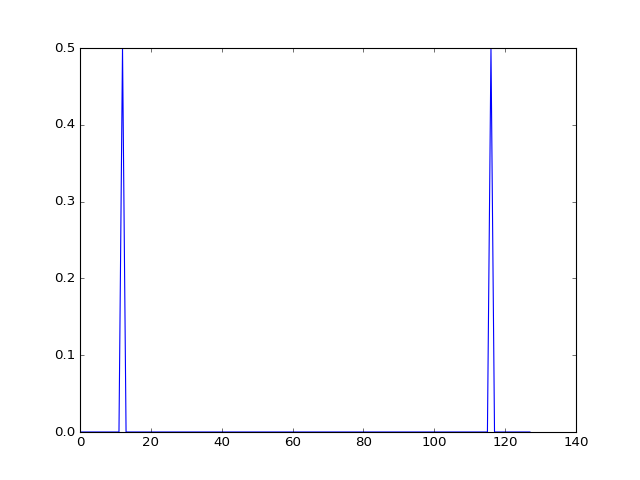

In [23]:
plt.figure()
plt.plot(mag)

# Changement d'échantillonnage 

In [25]:
t1 = np.arange(0, 10, 1/25) # en µs
t2 = np.arange(0, 10, 1/40) # en µs

In [ ]:
t1

In [39]:
freq = 2.43 # MHz

In [40]:
s1 = np.sin(2 * np.pi * freq * t1)
s2 = np.sin(2 * np.pi * freq * t2)

<IPython.core.display.Javascript object>


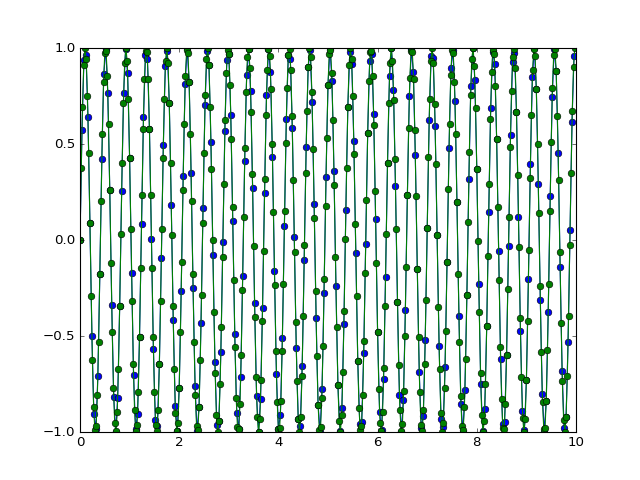

In [41]:
plt.figure()
plt.plot(t1, s1, '-o')
plt.plot(t2, s2, '-o')

ifft résoud-t-il le problème ? 

In [42]:
X1 = np.fft.ifft(s1)
X2 = np.fft.ifft(s2)
mag1 = np.abs(X1)
mag2 = np.abs(X2)

In [43]:
max(mag1)

0.42837742704243031

In [44]:
max(mag2)

0.42902158189352596

In [45]:
freqs1 = np.fft.fftfreq(s1.size, d=t1[1]-t1[0])
freqs2 = np.fft.fftfreq(s2.size, d=t2[1]-t2[0])

<IPython.core.display.Javascript object>


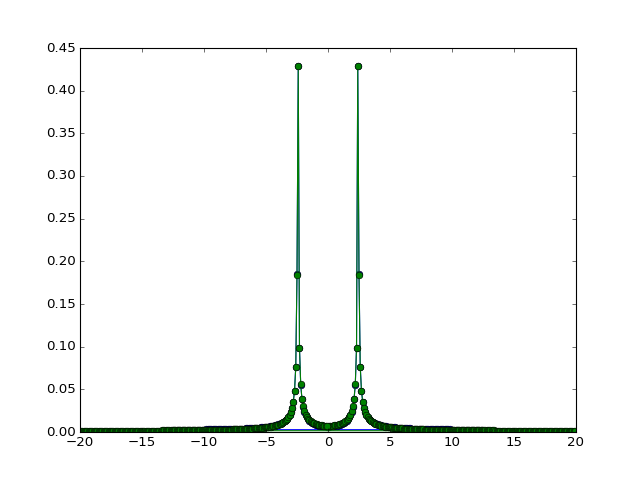

In [46]:
plt.figure()
plt.plot(freqs1, mag1, '-o')
plt.plot(freqs2, mag2, '-o')

# Fenêtres différentes, échantillonnage différent

In [86]:
freq = 2.43 # MHz

In [87]:
t1 = np.arange(0, 10, 1/25) # en µs
t2 = np.arange(0, 50, 1/25) # en µs

In [88]:
s1 = np.sin(2 * np.pi * freq * t1)
s2 = np.sin(2 * np.pi * freq * t2)

<IPython.core.display.Javascript object>


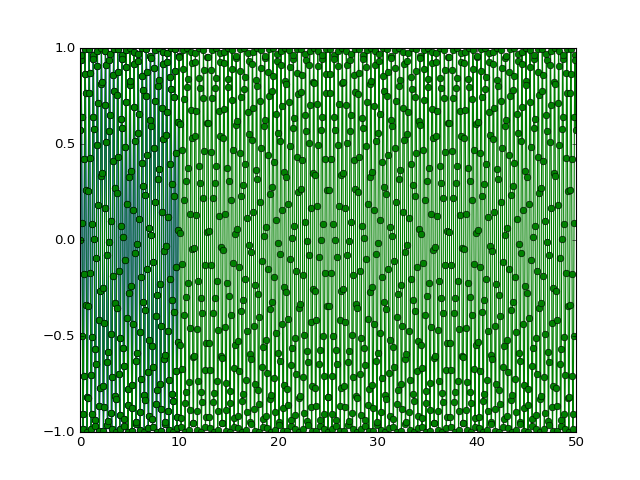

In [89]:
plt.figure()
plt.plot(t1, s1, '-o')
plt.plot(t2, s2, '-o')

In [90]:
X1 = np.fft.ifft(s1)
X2 = np.fft.ifft(s2)
mag1 = np.abs(X1)
mag2 = np.abs(X2)

In [91]:
freqs1 = np.fft.fftfreq(s1.size, d=t1[1]-t1[0])
freqs2 = np.fft.fftfreq(s2.size, d=t2[1]-t2[0])

<IPython.core.display.Javascript object>


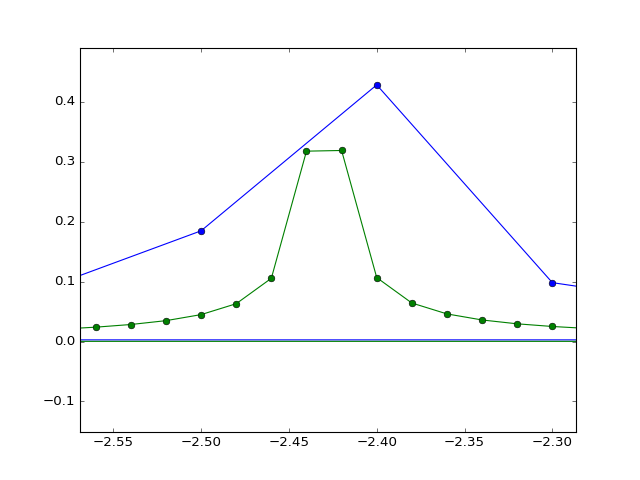

In [92]:
plt.figure()
plt.plot(freqs1, mag1, '-o')
plt.plot(freqs2, mag2, '-o')

In [82]:
np.sum(mag1**2)

0.49999999999999983

In [83]:
np.sum(mag2**2)

0.49999999999999989

In [84]:
np.sum(s1**2)

125.0

In [85]:
np.sum(s2**2)

625.0

# Hamming 

In [95]:
X1 = np.fft.ifft(np.blackman(s1.size) * s1)
X2 = np.fft.ifft(np.blackman(s2.size) * s2)
mag1 = np.abs(X1)
mag2 = np.abs(X2)

<IPython.core.display.Javascript object>


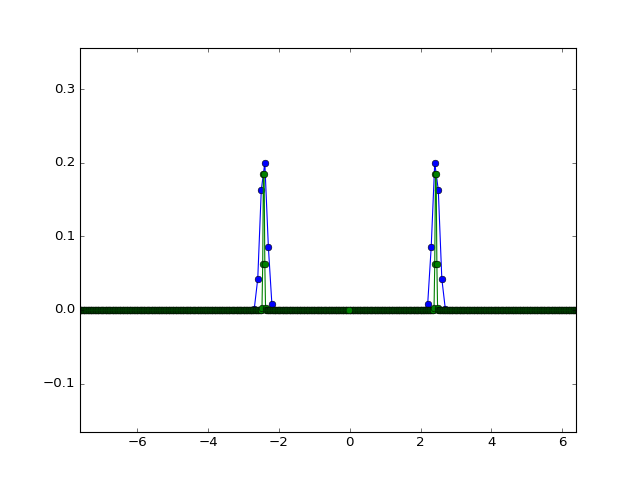

In [96]:
plt.figure()
plt.plot(freqs1, mag1, '-o')
plt.plot(freqs2, mag2, '-o')

# Zeropadding 

In [100]:
s1 = np.sin(2 * np.pi * freq * t1)
s2 = np.sin(2 * np.pi * freq * t2)

In [130]:
s2.size

1250

In [133]:
0.5 * 1250 / 8192

0.0762939453125

In [121]:
N = 8192
X1 = np.fft.ifft(s1, n=N)
X2 = np.fft.ifft(s2, n=N)
mag1 = np.abs(X1)
mag2 = np.abs(X2)

In [122]:
freqs1 = np.fft.fftfreq(N, d=t1[1]-t1[0])
freqs2 = np.fft.fftfreq(N, d=t2[1]-t2[0])

<IPython.core.display.Javascript object>


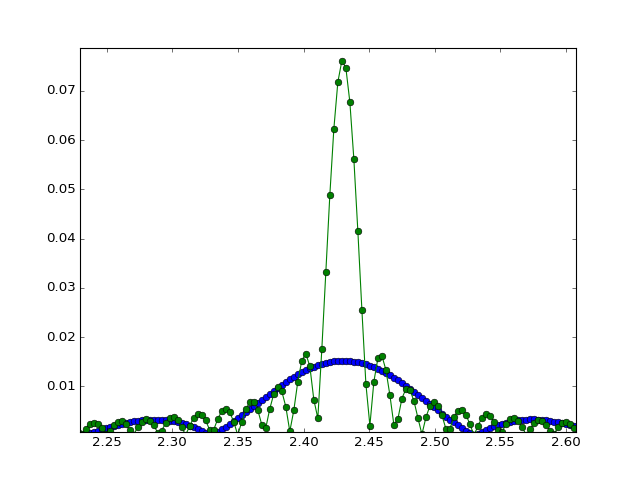

In [123]:
plt.figure()
plt.plot(freqs1, mag1, '-o')
plt.plot(freqs2, mag2, '-o')

In [124]:
0.07 / 0.016 

4.375

In [125]:
np.sum(mag1**2)

0.015229207667641655

In [126]:
np.sum(mag2**2)

0.076293945312499986

In [127]:
np.sum(mag1**2) * t2.max() / t1.max()

0.076390684244515769

In [128]:
np.sum(s1**2)

124.75766921332047

In [129]:
np.sum(s2**2)

624.99999999999977

# Normalisation par 1/T_ech 